Load data and create a subset (1% of full dataset)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd

df = pd.read_csv('data/instafreebie2-21-17_recommend_log.csv')
df01 = df.iloc[-295918:]

EDA

In [6]:
print 'Dataset shape:', df.shape
print 'Subset shape:', df01.shape

Dataset shape: (29591800, 12)
Subset shape: (295918, 12)


In [20]:
print "Columns:"
for col in df.columns:
    print col

Columns:
id
source
reader_id
from_book_id
book_id
ad_id
boost_id
clicked
claimed
optin
created_at
updated_at


In [21]:
df.head()

,id,source,reader_id,from_book_id,book_id,ad_id,boost_id,clicked,claimed,optin,created_at,updated_at
0,1,success_page,94918,4584,4666,0,0,0,0,0,2015-10-21 18:13:33,2015-10-21 18:13:33
1,2,success_page,94918,4584,4192,0,0,0,0,0,2015-10-21 18:13:33,2015-10-21 18:13:33
2,3,success_page,94918,4584,4395,0,0,0,0,0,2015-10-21 18:13:33,2015-10-21 18:13:33
3,4,success_page,24635,4757,3441,0,0,0,0,0,2015-10-21 18:14:31,2015-10-21 18:14:31
4,5,success_page,24635,4757,4395,0,0,0,0,0,2015-10-21 18:14:31,2015-10-21 18:14:31


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591800 entries, 0 to 29591799
Data columns (total 12 columns):
id              int64
source          object
reader_id       int64
from_book_id    int64
book_id         int64
ad_id           int64
boost_id        int64
clicked         int64
claimed         int64
optin           int64
created_at      object
updated_at      object
dtypes: int64(9), object(3)
memory usage: 2.6+ GB


In [23]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295918 entries, 29295882 to 29591799
Data columns (total 12 columns):
id              295918 non-null int64
source          295918 non-null object
reader_id       295918 non-null int64
from_book_id    295918 non-null int64
book_id         295918 non-null int64
ad_id           295918 non-null int64
boost_id        295918 non-null int64
clicked         295918 non-null int64
claimed         295918 non-null int64
optin           295918 non-null int64
created_at      295918 non-null object
updated_at      295918 non-null object
dtypes: int64(9), object(3)
memory usage: 27.1+ MB


In [12]:
df_clicked = df.clicked.sum()
df_claimed = df.claimed.sum()
df_optin = df.optin.sum()
data_points = float(df.shape[0])/100
print 'Dataset'
print '  clicked: {0}   claimed: {1}   optin: {2}'.format(df_clicked, df_claimed, df_optin)
print '   percent: {0:.2f}%    percent: {1:.2f}%     percent: {2:.2f}%'.format(df_clicked/data_points, df_claimed/data_points, df_optin/data_points)

df01_clicked = df01.clicked.sum()
df01_claimed = df01.claimed.sum()
df01_optin = df01.optin.sum()
data_points01 = float(df01.shape[0])/100
print 'Subset'
print '  clicked: {0}     claimed: {1}     optin: {2}'.format(df01_clicked, df01_claimed, df01_optin)
print '   percent: {0:.2f}%    percent: {1:.2f}%     percent: {2:.2f}%'.format(df01_clicked/data_points01, df01_claimed/data_points01, df01_optin/data_points01)

Dataset
  clicked: 3106707   claimed: 2808850   optin: 1585696
   percent: 10.50%    percent: 9.49%     percent: 5.36%
Subset
  clicked: 32255     claimed: 28607     optin: 0
   percent: 10.90%    percent: 9.67%     percent: 0.00%


In [8]:
print 'Dataset'
print 'Number of unique readers: {0} and books reccommended: {1}'.format(df.reader_id.nunique(), df.book_id.nunique())

print '\nSubset'
print 'Number of unique readers: {0} and books reccommended: {1}'.format(df01.reader_id.nunique(), df01.book_id.nunique())

Dataset
Number of unique readers: 508163 and books reccommended: 10078

Subset
Number of unique readers: 21726 and books reccommended: 6276


Dataset
<br>Average reccommendations per reader: 58.2 
<br>Average reccommendation per book: 2936

Subset
<br>Average reccommendations per reader: 13.6
<br>Average reccommendation per book: 47.2

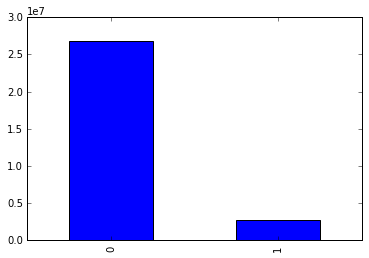

In [14]:
df.claimed.value_counts().plot(kind='bar');

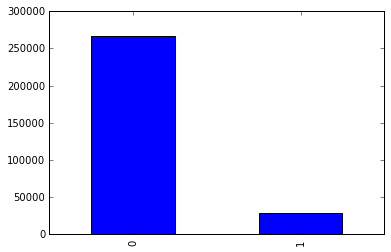

In [13]:
df01.claimed.value_counts().plot(kind='bar');

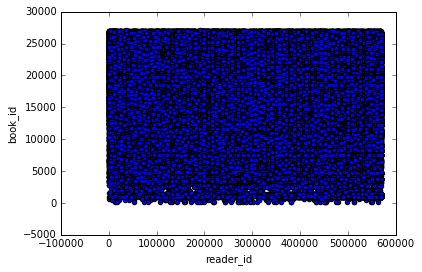

In [19]:
df01.plot(x='reader_id', y='book_id', kind='scatter', legend=True);